<a href="https://colab.research.google.com/github/chanpaulamol/Image_Processing_Computer_Vision/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
# Access my drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np

Linear Transformation of Brightness

Change the Brightness Level
---------------------------
Enter a brightness value: 60


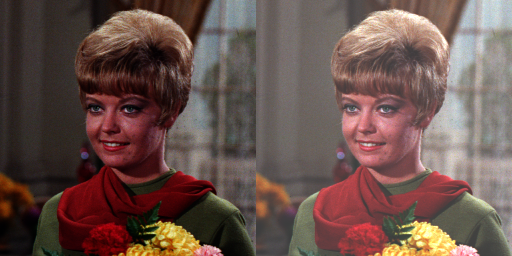

In [ ]:
print('Change the Brightness Level')
print('---------------------------')
try:
  brightness = int(input('Enter a brightness value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)
# Access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# Simple way for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TASK

1. Implement Image Inverse

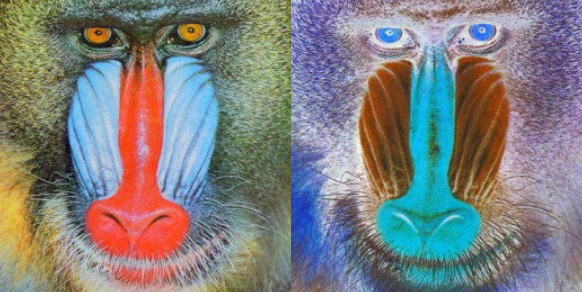

In [ ]:
# Load Image and 
mandril = cv.imread('/content/drive/MyDrive/PCVK/Images/mandril.jpg')
mandril_img = np.zeros(mandril.shape, mandril.dtype)
# Loop
for i in range(mandril.shape[0]):
  for j in range(mandril.shape[1]):
    for k in range(mandril.shape[2]):
      mandril_img[i, j, k] = 255 - np.clip(mandril[i, j, k], 0, 255)
img2 = cv.hconcat((mandril, mandril_img))
cv2_imshow(img2)

2. Image Contrast Transformation 

Enter contrast value [-255 - 255]: -200


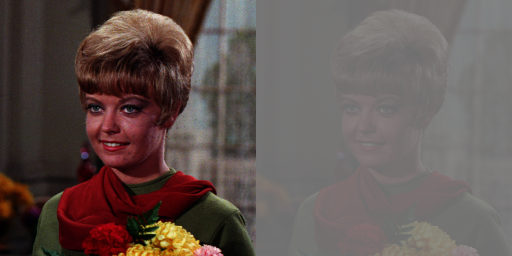

In [ ]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
transform_img = np.zeros(img3.shape, img3.dtype)
try:
  contrast = float(input('Enter contrast value [-255 - 255]: '))
  brightness_value = 60
except ValueError as e:
  print('Error', e)
factor = (259 * (contrast  + 255)) / (255 * (259 - contrast))
# Constrast Transformation 
for y in range(img3.shape[0]):
  for x in range(img3.shape[1]):
    for c in range(img3.shape[2]):
      transform_img[y, x, c] =  np.clip((factor * (img3[y, x, c] - 128) + 128) ,0, 255)

transform = cv.hconcat((img3,  transform_img))
cv2_imshow(transform)

3. Implement Transformation of Logarithmic Brightness

Enter a brightness value: 40


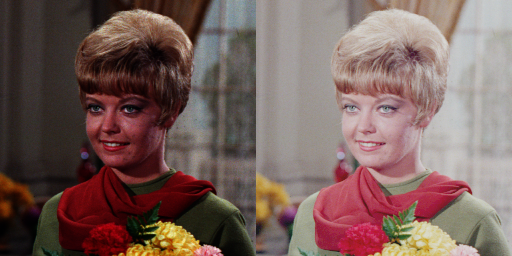

In [ ]:
# Import math module
import math
img4 = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
logarithmic_img = np.zeros(img3.shape, img3.dtype)

try:
  b = int(input('Enter a brightness value: '))
except ValueError:
  print('Error, not a number')

for y in range(img3.shape[0]):
  for x in range(img3.shape[1]):
    for c in range(img3.shape[2]):
      logarithmic_img[y, x, c] = b * math.log(1 + img4[y, x, c])

log_transformation = cv.hconcat((img4, logarithmic_img))
cv2_imshow(log_transformation)

4. Implement GrayScale Transformation

a) Averaging 

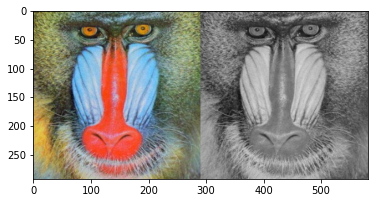

In [3]:
# Read Image and Convert color channel to RGB
img5 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandril.jpg')
img6 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
avg_img = np.zeros(img6.shape, img6.dtype)
# Averaging the image
for y in range(img6.shape[0]):
  for x in range(img6.shape[1]):
    for c in range(img6.shape[2]):
      avg_img[y, x, c] = np.mean(img6[y, x, : ])
      
# concatenate the original and transformed images
avg_brightness = cv.hconcat((img6,  avg_img))
plt.imshow(avg_brightness)

b) Lightness Grayscale Transformation

<ipython-input-34-ef8fd96b81f8>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  lightness_img[y, x, c] = (max(R, G, B) + min(R, G, B))/2


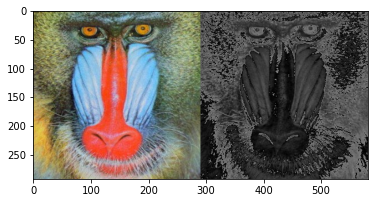

In [ ]:
# Read Image and Convert color channel to RGB
img5 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandril.jpg')
img7 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
lightness_img = np.zeros(img6.shape, img6.dtype)
# Loop

for y in range(img7.shape[0]):
    for x in range(img7.shape[1]):
      for c in range(img7.shape[2]):
          R, G, B = img7[y, x, :]
          lightness_img[y, x, c] = (max(R, G, B) + min(R, G, B))/2

# concatenate the original and transformed images
lightness_transform = cv.hconcat((img7, lightness_img))
plt.imshow(lightness_transform)

C) Grayscale Luminance Transformation

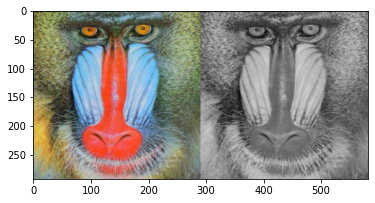

In [ ]:
# Read Input Image 
img5 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandril.jpg')
# Covert from BGR to RGB
img7 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
lu_img = np.zeros(img7.shape, img7.dtype)
# Loop
for y in range(img7.shape[0]):
  for x in range(img7.shape[1]):
    for c in range(img7.shape[2]):
      R, G, B = img7[y, x, :]
      lu_img[y, x, c] = (0.21 * R + 0.72 * G + 0.07 * B)

luminance_transform = cv.hconcat((img7, lu_img))
plt.imshow(luminance_transform)

5. Show certain colors in the image, and change other colors to grayscale. 

- Show blue color in the image input and change the parts which is not colored blue into grayscale

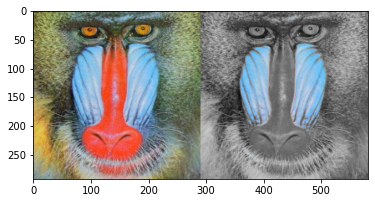

In [58]:
# Read input image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandril.jpg')

# Convert color space to RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = np.copy(img_rgb)

for y in range(img_rgb.shape[0]):
    for x in range(img_rgb.shape[1]):
          r = img_rgb[y, x,0]

          g = img_rgb[y, x,1]
          b = img_rgb[y, x,2]

          if r > 10 and g > 10 and b < 200:
            gray_value = 0.21 * r + 0.72 * g + 0.07 * b
            img_gray[y, x] = [gray_value, gray_value,gray_value]

# Concatenate the input and output images 
combined = cv.hconcat((img_rgb, img_gray))
plt.imshow(combined)